## Data & module Loading

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from googletrans import Translator
import googletrans
%matplotlib inline

In [3]:
df_train = pd.read_csv('./data/sales_train.csv.gz',)
df_test = pd.read_csv('./data/test.csv.gz')
df_items = pd.read_csv('./data/items.csv')
df_item_categories = pd.read_csv('./data/item_categories.csv')
df_shop = pd.read_csv('./data/shops.csv')
df_sample_submission = pd.read_csv('./data/sample_submission.csv.gz')

## Data shape & structure
###  df_train
* date : 2013년 2월 부터 2015년 10월 까지
* date_block_num : 2013년 1월 부터 2015년 12월 까지 순서대로(0~33)
* shop_id
* item_price
* item_cnt_day : 판매량(마이너스 경우 반품), train의 Y값


* shape : (2935849, 6)
* 수치형 : item_price, item_cnt_day // 카테고리형 : date, date_block_num, shop_id, itme_id


### df_test
* ID : Key index
* shop_id
* item_id


* shape : (214200, 3)
* Target : item_cnt_day

In [4]:
df_train.head()

date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0

### 가게의 상품 월별 매출

In [5]:
np.sort(df_train['shop_id'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59], dtype=int64)

In [6]:
df_train['shop_id'].unique().shape #Train 데이터의 shop ID 수 60

(60,)

In [7]:
df_test.head()

ID  shop_id  item_id
0   0        5     5037
1   1        5     5320
2   2        5     5233
3   3        5     5232
4   4        5     5268

In [8]:
np.sort(df_test['shop_id'].unique())

array([ 2,  3,  4,  5,  6,  7, 10, 12, 14, 15, 16, 18, 19, 21, 22, 24, 25,
       26, 28, 31, 34, 35, 36, 37, 38, 39, 41, 42, 44, 45, 46, 47, 48, 49,
       50, 52, 53, 55, 56, 57, 58, 59], dtype=int64)

In [9]:
df_test['shop_id'].unique().shape # Test 데이터의 shop ID 수 42

(42,)

* 1, 8, 9, 11, 13, 17, 20, 23, 27, 32, 40, 43, 51, 54 가게 test에 없음

In [10]:
df_items.head() # item_name이 키릴 문자로 변환 해서 지역명을 볼 수 있도록 하겠음

item_name  item_id  \
0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1  !ABBYY FineReader 12 Professional Edition Full...        1   
2      ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3    ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
4        ***КОРОБКА (СТЕКЛО)                       D        4   

   item_category_id  
0                40  
1                76  
2                40  
3                40  
4                40

In [11]:
translator = Translator()

In [12]:
a = translator.translate(df_items['item_name'][0],dest='en')
print (a)
print(a.text)

Translated(src=ru, dest=en, text=!! IN THE POWER OF HAPPINESS (PLAST) D, pronunciation=None)
!! IN THE POWER OF HAPPINESS (PLAST) D


### 키릴 문자 변환(함수 생성)

In [13]:
# translator = Translator()
# trans_ranguage = lambda x : ((translator.translate(x, dest='en')).text) #람다는 한번 쓰면 끝?

In [14]:
def russian_translate(series):
    translator = Translator()
    translate = lambda x : ((translator.translate(x, dest='en',src='ru')).text)
    value = np.array(list(map(translate,series.values)))
    return np.reshape(value,(-1,1))
    #칼럼의 시리즈를 받아서
    #해당 시리즈에 맞는 넘파이 어레이로 반환

In [15]:
df_item_categories['item_category_name']= russian_translate(df_item_categories['item_category_name'])
df_shop['shop_name']=russian_translate(df_shop['shop_name'])

# df_items['item_name']=russian_translate(df_items['item_name'])
# JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [16]:
df_item_categories.head()

item_category_name  item_category_id
0  PC - Headsets / Headphones                 0
1           Accessories - PS2                 1
2           Accessories - PS3                 2
3           Accessories - PS4                 3
4           Accessories - PSP                 4

In [17]:
# list(map(trans_ranguage,np.reshape( df_item_categories['item_category_name'].values, (-1,1))))
# np.array(list(map(trans_ranguage,np.reshape (df_items_trans_test['item_name'].values,(-1,1))))) # 이방식으로 할거
# df_items_trans_test.head()

# np.array(list(map(trans_ranguage,df_item_categories['item_category_name'].values)))

In [18]:
df_item_categories.head() #키릴 문자 변환 후 카테고리 분석

item_category_name  item_category_id
0  PC - Headsets / Headphones                 0
1           Accessories - PS2                 1
2           Accessories - PS3                 2
3           Accessories - PS4                 3
4           Accessories - PSP                 4

In [19]:
df_shop.head() #상동

shop_name  shop_id
0       Yakutsk Ordzhonikidze, 56 francs        0
1             Yakutsk TC "Central" franc        1
2          Adygea Shopping Center "Mega"        2
3       Balashikha TRK "October-Kinomir"        3
4  Volzhsky shopping center "Volga Mall"        4

In [20]:
df_shop.shape

(60, 2)

In [158]:
df_sample_submission.head()

ID  item_cnt_month
0   0            0.50
1   1            0.50
2   2            0.50
3   3            0.50
4   4            0.50

## 가설 적용전 Train data 통계정보, 상관관계 및 결측치, 특이사항 파악
1. 결측치
    - 없음
    
    
2. 통계정보
    - item_price : min -1(가격에 음의 값), max 이상값
    - item_cnt_day : min -22, max 이상값


3. 상관관계
    - 유의미한 정보는 없음
    - date_block_num , item_price = 0.1
    - item_id, item_price = -0.13
    - 월과 상품가격(+), 상품ID와 상품가격(-) 

In [22]:
df_train[df_train.isnull()].count()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [23]:
pd.set_option('display.float_format', lambda x : '%.2f' % x) # 소수 둘째 자리까지 보이도록

In [24]:
df_train.describe() # Item_price, item_cnt_day와 같은 연속형 값 기준 확인할 것

date_block_num    shop_id    item_id  item_price  item_cnt_day
count      2935849.00 2935849.00 2935849.00  2935849.00    2935849.00
mean            14.57      33.00   10197.23      890.85          1.24
std              9.42      16.23    6324.30     1729.80          2.62
min              0.00       0.00       0.00       -1.00        -22.00
25%              7.00      22.00    4476.00      249.00          1.00
50%             14.00      31.00    9343.00      399.00          1.00
75%             23.00      47.00   15684.00      999.00          1.00
max             33.00      59.00   22169.00   307980.00       2169.00

In [25]:
# df_train.item_price.plot(kind='hist',xlim=(0,4000),bins=700)

In [26]:
# df_train.item_cnt_day.plot(kind='hist',xlim=(-2.5,8),bins=700)

In [27]:
#attributes = df_train.columns.tolist()

In [28]:
#pd.scatter_matrix(df_train[attributes],figsize = (24,16))

- item_ptrice와 item_cnt_day가 음의 상관관계를 보이는 것 같음

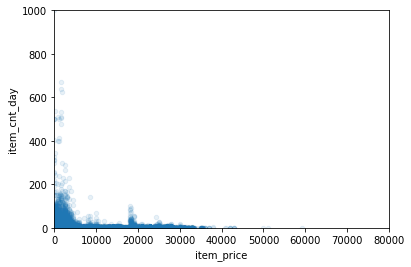

In [29]:
df_train.plot(kind = "scatter", x = "item_price", y="item_cnt_day",alpha = 0.1, xlim=(0,80000),ylim=(0,1000))

In [30]:
#df_train.corr()
#corr
#date_block_num , item_price = 0.1
#item_id, item_price = -0.13


In [31]:
df_train['date_block_num'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33], dtype=int64)

# 가설
1. 지역의 영향 (대도시권, 중소규모 도시)

2. On, Off line 매장 구분의 영향

3. 상품 카테고리별 영향

4. 프로모션의 영향

### 1. 지역의 영향
* shop_name에서 지역명만 추출

In [32]:
df_shop.head()

shop_name  shop_id
0       Yakutsk Ordzhonikidze, 56 francs        0
1             Yakutsk TC "Central" franc        1
2          Adygea Shopping Center "Mega"        2
3       Balashikha TRK "October-Kinomir"        3
4  Volzhsky shopping center "Volga Mall"        4

In [33]:
df_shop[['shop_name']].head()

shop_name
0       Yakutsk Ordzhonikidze, 56 francs
1             Yakutsk TC "Central" franc
2          Adygea Shopping Center "Mega"
3       Balashikha TRK "October-Kinomir"
4  Volzhsky shopping center "Volga Mall"

In [34]:
shop_name_split = df_shop['shop_name'].str.split(' ',expand=True)
shop_name_split.head()

0               1                  2       3      4     5     6
0     Yakutsk  Ordzhonikidze,                 56  francs   None  None  None
1     Yakutsk              TC          "Central"   franc   None  None  None
2      Adygea        Shopping             Center  "Mega"   None  None  None
3  Balashikha             TRK  "October-Kinomir"    None   None  None  None
4    Volzhsky        shopping             center  "Volga  Mall"  None  None

In [35]:
location_name = shop_name_split[[0]]
location_name.rename(columns={0:'location_name'},inplace=True)
location_name.head()

c:\users\cch88\miniconda3\envs\ml_python\lib\site-packages\pandas\core\frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


location_name
0       Yakutsk
1       Yakutsk
2        Adygea
3    Balashikha
4      Volzhsky

In [36]:
df_shop_new=pd.concat([df_shop,location_name],axis=1)
df_shop_new.head()

shop_name  shop_id location_name
0       Yakutsk Ordzhonikidze, 56 francs        0       Yakutsk
1             Yakutsk TC "Central" franc        1       Yakutsk
2          Adygea Shopping Center "Mega"        2        Adygea
3       Balashikha TRK "October-Kinomir"        3    Balashikha
4  Volzhsky shopping center "Volga Mall"        4      Volzhsky

#### Russia population Census 참고
* 2014년 census 정보만 가져올것임
* https://gist.githubusercontent.com/logvik/cf787bda80a8aa125c84/raw/2749e1679670baad67fd9361feb7cb5437f2d8ad/population.csv csv 파일
* Oblast,Krai는 주를 의미 (람다 식의 적용으로 제거)

In [38]:
df_population = pd.read_csv('./data/population.csv')
df_population.head()

Code               Name  year1959  year1970  year1979  year1989  year2002  \
0  MOW             Moscow   5085581   7061008   8010954   8967232  10382754   
1  MOS      Moscow Oblast   5863003   5774529   6359385   6693623   6618538   
2  KDA     Krasnodar Krai   3477809   4124163   4410331   4680560   5125221   
3  SPE     St. Petersburg   3321196   3949501   4588183   5023506   4661219   
4  SVE  Sverdlovsk Oblast   4044416   4319741   4453491   4716768   4486214   

   year2010  year2013  year2014  
0  11503501  11979529  12108257  
1   7095120   7048084   7133620  
2   5226647   5330181   5404273  
3   4879566   5028000   5131942  
4   4297747   4315830   4320677

In [39]:
df_population.drop(df_population.columns[2:-1], axis=1, inplace= True)
df_population.drop(['Code'],axis=1,inplace=True)

In [40]:
df_population.head()

Name  year2014
0             Moscow  12108257
1      Moscow Oblast   7133620
2     Krasnodar Krai   5404273
3     St. Petersburg   5131942
4  Sverdlovsk Oblast   4320677

In [41]:
# df_population['Name'][1].replace(' Oblast','')

re = lambda x : x.replace(' Oblast','')
re_2 = lambda x : x.replace(' Krai','')
df_population['Name'] = df_population['Name'].apply(re)
df_population['Name'] = df_population['Name'].apply(re_2)
df_population.drop(1,inplace=True)# 모스크바 도심과 광역 중 도심만 선택

In [42]:
df_population.head()

Name  year2014
0          Moscow  12108257
2       Krasnodar   5404273
3  St. Petersburg   5131942
4      Sverdlovsk   4320677
5          Rostov   4245532

#### df_shop_new와 df_population merge
* 지역명 기준으로 merge 23개 지역이 인구수 Nan값 데이터 파일에 도시명과 지역명이 상이한 경우임

In [43]:
df_shop_new_2 = pd.merge(df_shop_new, df_population, left_on='location_name', right_on='Name',how='left')
df_shop_new_2.head()

shop_name  shop_id location_name Name  year2014
0       Yakutsk Ordzhonikidze, 56 francs        0       Yakutsk  NaN       nan
1             Yakutsk TC "Central" franc        1       Yakutsk  NaN       nan
2          Adygea Shopping Center "Mega"        2        Adygea  NaN       nan
3       Balashikha TRK "October-Kinomir"        3    Balashikha  NaN       nan
4  Volzhsky shopping center "Volga Mall"        4      Volzhsky  NaN       nan

In [44]:
df_shop_new_2[df_shop_new_2['year2014'].isnull()]

shop_name  shop_id location_name  \
0                    Yakutsk Ordzhonikidze, 56 francs        0       Yakutsk   
1                          Yakutsk TC "Central" franc        1       Yakutsk   
2                       Adygea Shopping Center "Mega"        2        Adygea   
3                    Balashikha TRK "October-Kinomir"        3    Balashikha   
4               Volzhsky shopping center "Volga Mall"        4      Volzhsky   
9                                      Outbound Trade        9      Outbound   
10                        Zhukovsky Str. Chkalov 39m?       10     Zhukovsky   
11                       Zhukovsky Str. Chkalov 39 m²       11     Zhukovsky   
12                              Online shop Emergency       12        Online   
13                    Kazan Shopping Center "Bahetle"       13         Kazan   
14               Kazan Shopping Center "ParkHouse" II       14         Kazan   
16                      Kolomna shopping center "Rio"       16       Kolomna   
33                                Mytischi TRK "XL-3"       33      Mytischi   
34                               N.Novgorod TRC "RIO"       34    N.Novgorod   
35                         N.Novgorod SEC "Fantastic"       35    N.Novgorod   
39              RostovNaDonu TRC "Megacenter Horizon"       39  RostovNaDonu   
40       RostovNaDonu TRC "Megacenter Horizon" Island       40  RostovNaDonu   
41                RostovNaDonu Shopping Center "Mega"       41  RostovNaDonu   
42                             SPb TC "Nevsky Center"       42           SPb   
43                                   SPb TK "Sennaya"       43           SPb   
46                Sergiev Posad Shopping center "7YA"       46       Sergiev   
47  Surgut shopping and entertainment center "City...       47        Surgut   
52                                   Ufa TC "Central"       52           Ufa   
53                                  Ufa TC "Family" 2       53           Ufa   
54                      Khimki Shopping Center "Mega"       54        Khimki   
55                        Digital warehouse 1C-Online       55       Digital   
56                             Chekhov SEC "Carnival"       56       Chekhov   
57                          Yakutsk Ordzhonikidze, 56       57       Yakutsk   
58                    Yakutsk Central shopping center       58       Yakutsk   

   Name  year2014  
0   NaN       nan  
1   NaN       nan  
2   NaN       nan  
3   NaN       nan  
4   NaN       nan  
9   NaN       nan  
10  NaN       nan  
11  NaN       nan  
12  NaN       nan  
13  NaN       nan  
14  NaN       nan  
16  NaN       nan  
33  NaN       nan  
34  NaN       nan  
35  NaN       nan  
39  NaN       nan  
40  NaN       nan  
41  NaN       nan  
42  NaN       nan  
43  NaN       nan  
46  NaN       nan  
47  NaN       nan  
52  NaN       nan  
53  NaN       nan  
54  NaN       nan  
55  NaN       nan  
56  NaN       nan  
57  NaN       nan  
58  NaN       nan

In [45]:
df_shop_new_2.loc[[42,43],['year2014']]=5131942
#상트 페테르 부르크 표기 차이

df_shop_new_2.loc[[12,55],['year2014']]=10000000 
#러시아 인터넷 유저 8천만 중 1/8

df_shop_new_2.loc[[9],['year2014']]=5000000


In [46]:
df_shop_new_2[df_shop_new_2['year2014'].isnull()] # 추가 인구 결측치 지역은 딕트 형태로 태깅후 어플라이 시키겠음

shop_name  shop_id location_name  \
0                    Yakutsk Ordzhonikidze, 56 francs        0       Yakutsk   
1                          Yakutsk TC "Central" franc        1       Yakutsk   
2                       Adygea Shopping Center "Mega"        2        Adygea   
3                    Balashikha TRK "October-Kinomir"        3    Balashikha   
4               Volzhsky shopping center "Volga Mall"        4      Volzhsky   
10                        Zhukovsky Str. Chkalov 39m?       10     Zhukovsky   
11                       Zhukovsky Str. Chkalov 39 m²       11     Zhukovsky   
13                    Kazan Shopping Center "Bahetle"       13         Kazan   
14               Kazan Shopping Center "ParkHouse" II       14         Kazan   
16                      Kolomna shopping center "Rio"       16       Kolomna   
33                                Mytischi TRK "XL-3"       33      Mytischi   
34                               N.Novgorod TRC "RIO"       34    N.Novgorod   
35                         N.Novgorod SEC "Fantastic"       35    N.Novgorod   
39              RostovNaDonu TRC "Megacenter Horizon"       39  RostovNaDonu   
40       RostovNaDonu TRC "Megacenter Horizon" Island       40  RostovNaDonu   
41                RostovNaDonu Shopping Center "Mega"       41  RostovNaDonu   
46                Sergiev Posad Shopping center "7YA"       46       Sergiev   
47  Surgut shopping and entertainment center "City...       47        Surgut   
52                                   Ufa TC "Central"       52           Ufa   
53                                  Ufa TC "Family" 2       53           Ufa   
54                      Khimki Shopping Center "Mega"       54        Khimki   
56                             Chekhov SEC "Carnival"       56       Chekhov   
57                          Yakutsk Ordzhonikidze, 56       57       Yakutsk   
58                    Yakutsk Central shopping center       58       Yakutsk   

   Name  year2014  
0   NaN       nan  
1   NaN       nan  
2   NaN       nan  
3   NaN       nan  
4   NaN       nan  
10  NaN       nan  
11  NaN       nan  
13  NaN       nan  
14  NaN       nan  
16  NaN       nan  
33  NaN       nan  
34  NaN       nan  
35  NaN       nan  
39  NaN       nan  
40  NaN       nan  
41  NaN       nan  
46  NaN       nan  
47  NaN       nan  
52  NaN       nan  
53  NaN       nan  
54  NaN       nan  
56  NaN       nan  
57  NaN       nan  
58  NaN       nan

In [47]:
non_pop_index = df_shop_new_2[df_shop_new_2['year2014'].isnull()].index.tolist()

In [48]:
df_shop_new_2[df_shop_new_2['year2014'].isnull()]['location_name'].unique().tolist()

['Yakutsk',
 'Adygea',
 'Balashikha',
 'Volzhsky',
 'Zhukovsky',
 'Kazan',
 'Kolomna',
 'Mytischi',
 'N.Novgorod',
 'RostovNaDonu',
 'Sergiev',
 'Surgut',
 'Ufa',
 'Khimki',
 'Chekhov']

In [49]:
population_tag = {
'Yakutsk': 269601,
'Adygea':444403,
'Balashikha':215494,
'Volzhsky':314255,
'Zhukovsky':104736 ,
'Kazan':1143535,
'Kolomna':144589 ,
'Mytischi':173160 ,
'N.Novgorod':1250619,
'RostovNaDonu':1089261 ,
'Sergiev':111179 ,
'Surgut': 341000,
'Ufa': 1023000,
'Khimki':207425 ,
'Chekhov':60720
}

In [50]:
df_shop_new_2.loc[non_pop_index,['year2014']]=df_shop_new_2[df_shop_new_2['year2014'].isnull()].location_name.map(population_tag)

In [51]:
df_shop_new_2[df_shop_new_2['year2014'].isnull()]

Empty DataFrame
Columns: [shop_name, shop_id, location_name, Name, year2014]
Index: []

In [52]:
df_shop_new_2.head()

shop_name  shop_id location_name Name  year2014
0       Yakutsk Ordzhonikidze, 56 francs        0       Yakutsk  NaN 269601.00
1             Yakutsk TC "Central" franc        1       Yakutsk  NaN 269601.00
2          Adygea Shopping Center "Mega"        2        Adygea  NaN 444403.00
3       Balashikha TRK "October-Kinomir"        3    Balashikha  NaN 215494.00
4  Volzhsky shopping center "Volga Mall"        4      Volzhsky  NaN 314255.00

In [53]:
df_train.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day'],
      dtype='object')

In [54]:
df_train_location = pd.merge(df_train,df_shop_new_2,left_on = 'shop_id', right_on='shop_id', how='left')
df_train_location.head()

date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
0  02.01.2013               0       59    22154      999.00          1.00   
1  03.01.2013               0       25     2552      899.00          1.00   
2  05.01.2013               0       25     2552      899.00         -1.00   
3  06.01.2013               0       25     2554     1709.05          1.00   
4  15.01.2013               0       25     2555     1099.00          1.00   

                            shop_name location_name       Name    year2014  
0  Yaroslavl Shopping center "Altair"     Yaroslavl  Yaroslavl  1271766.00  
1                 Moscow TRK "Atrium"        Moscow     Moscow 12108257.00  
2                 Moscow TRK "Atrium"        Moscow     Moscow 12108257.00  
3                 Moscow TRK "Atrium"        Moscow     Moscow 12108257.00  
4                 Moscow TRK "Atrium"        Moscow     Moscow 12108257.00

In [55]:
df_train_location.drop(['date'],inplace=True,axis=1)

In [56]:
df_train_location.head()

date_block_num  shop_id  item_id  item_price  item_cnt_day  \
0               0       59    22154      999.00          1.00   
1               0       25     2552      899.00          1.00   
2               0       25     2552      899.00         -1.00   
3               0       25     2554     1709.05          1.00   
4               0       25     2555     1099.00          1.00   

                            shop_name location_name       Name    year2014  
0  Yaroslavl Shopping center "Altair"     Yaroslavl  Yaroslavl  1271766.00  
1                 Moscow TRK "Atrium"        Moscow     Moscow 12108257.00  
2                 Moscow TRK "Atrium"        Moscow     Moscow 12108257.00  
3                 Moscow TRK "Atrium"        Moscow     Moscow 12108257.00  
4                 Moscow TRK "Atrium"        Moscow     Moscow 12108257.00

In [57]:
df_train_location.drop(['Name'],axis=1,inplace=True)

In [58]:
df_train_location[df_train_location['shop_id']==0][df_train_location['item_id']==32]

c:\users\cch88\miniconda3\envs\ml_python\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


date_block_num  shop_id  item_id  item_price  item_cnt_day  \
40085                0        0       32      221.00          2.00   
40086                0        0       32      221.00          2.00   
40087                0        0       32      221.00          1.00   
40088                0        0       32      221.00          1.00   
173447               1        0       32      221.00          1.00   
173448               1        0       32      221.00          2.00   
173449               1        0       32      221.00          2.00   
173450               1        0       32      221.00          1.00   
173452               1        0       32      221.00          2.00   
173453               1        0       32      221.00          1.00   
173460               1        0       32      221.00          1.00   

                               shop_name location_name  year2014  
40085   Yakutsk Ordzhonikidze, 56 francs       Yakutsk 269601.00  
40086   Yakutsk Ordzhonikidze, 56 francs       Yakutsk 269601.00  
40087   Yakutsk Ordzhonikidze, 56 francs       Yakutsk 269601.00  
40088   Yakutsk Ordzhonikidze, 56 francs       Yakutsk 269601.00  
173447  Yakutsk Ordzhonikidze, 56 francs       Yakutsk 269601.00  
173448  Yakutsk Ordzhonikidze, 56 francs       Yakutsk 269601.00  
173449  Yakutsk Ordzhonikidze, 56 francs       Yakutsk 269601.00  
173450  Yakutsk Ordzhonikidze, 56 francs       Yakutsk 269601.00  
173452  Yakutsk Ordzhonikidze, 56 francs       Yakutsk 269601.00  
173453  Yakutsk Ordzhonikidze, 56 francs       Yakutsk 269601.00  
173460  Yakutsk Ordzhonikidze, 56 francs       Yakutsk 269601.00

In [59]:
df_item_cnt_month=df_train_location.groupby(['shop_id','item_id','date_block_num']).agg({
                                                                  'item_cnt_day' : sum})

In [60]:
df_item_cnt_month.head()

item_cnt_day
shop_id item_id date_block_num              
0       30      1                      31.00
        31      1                      11.00
        32      0                       6.00
                1                      10.00
        33      0                       3.00

In [61]:
df_item_cnt_month.reset_index(inplace=True)

In [62]:
df_item_cnt_month.head()

shop_id  item_id  date_block_num  item_cnt_day
0        0       30               1         31.00
1        0       31               1         11.00
2        0       32               0          6.00
3        0       32               1         10.00
4        0       33               0          3.00

In [63]:
df_item_cnt_month.rename(columns={'item_cnt_day': 'item_cnt_month'},inplace=True)
df_item_cnt_month.head()

shop_id  item_id  date_block_num  item_cnt_month
0        0       30               1           31.00
1        0       31               1           11.00
2        0       32               0            6.00
3        0       32               1           10.00
4        0       33               0            3.00

In [64]:
df_train_merge=pd.merge(df_train_location, df_item_cnt_month, 
         left_on=['shop_id','item_id','date_block_num'],
         right_on=['shop_id','item_id','date_block_num'],
        how ='left')

In [65]:
df_train_merge.head()

date_block_num  shop_id  item_id  item_price  item_cnt_day  \
0               0       59    22154      999.00          1.00   
1               0       25     2552      899.00          1.00   
2               0       25     2552      899.00         -1.00   
3               0       25     2554     1709.05          1.00   
4               0       25     2555     1099.00          1.00   

                            shop_name location_name    year2014  \
0  Yaroslavl Shopping center "Altair"     Yaroslavl  1271766.00   
1                 Moscow TRK "Atrium"        Moscow 12108257.00   
2                 Moscow TRK "Atrium"        Moscow 12108257.00   
3                 Moscow TRK "Atrium"        Moscow 12108257.00   
4                 Moscow TRK "Atrium"        Moscow 12108257.00   

   item_cnt_month  
0            1.00  
1            0.00  
2            0.00  
3            1.00  
4            1.00

In [66]:
df_train_fin=df_train_merge.groupby(['shop_id','item_id','date_block_num']).agg({'item_price':'mean',
                                                                                 'shop_name' : 'max',
                                                                                 'location_name' : 'max',
                                                                                 'year2014':'mean',
                                                                                 'item_cnt_day' : max,
                                                                                 'item_cnt_month' : max})
df_train_fin.head()

item_price  item_cnt_month  \
shop_id item_id date_block_num                               
0       30      1                   265.00           31.00   
        31      1                   434.00           11.00   
        32      0                   221.00            6.00   
                1                   221.00           10.00   
        33      0                   347.00            3.00   

                                                       shop_name  \
shop_id item_id date_block_num                                     
0       30      1               Yakutsk Ordzhonikidze, 56 francs   
        31      1               Yakutsk Ordzhonikidze, 56 francs   
        32      0               Yakutsk Ordzhonikidze, 56 francs   
                1               Yakutsk Ordzhonikidze, 56 francs   
        33      0               Yakutsk Ordzhonikidze, 56 francs   

                                item_cnt_day location_name  year2014  
shop_id item_id date_block_num                                        
0       30      1                       9.00       Yakutsk 269601.00  
        31      1                       3.00       Yakutsk 269601.00  
        32      0                       2.00       Yakutsk 269601.00  
                1                       2.00       Yakutsk 269601.00  
        33      0                       1.00       Yakutsk 269601.00

In [67]:
df_train_fin.reset_index(inplace=True)

In [68]:
df_train_fin.drop(['item_cnt_day'],inplace=True,axis=1)

In [69]:
df_train_fin.head()

shop_id  item_id  date_block_num  item_price  item_cnt_month  \
0        0       30               1      265.00           31.00   
1        0       31               1      434.00           11.00   
2        0       32               0      221.00            6.00   
3        0       32               1      221.00           10.00   
4        0       33               0      347.00            3.00   

                          shop_name location_name  year2014  
0  Yakutsk Ordzhonikidze, 56 francs       Yakutsk 269601.00  
1  Yakutsk Ordzhonikidze, 56 francs       Yakutsk 269601.00  
2  Yakutsk Ordzhonikidze, 56 francs       Yakutsk 269601.00  
3  Yakutsk Ordzhonikidze, 56 francs       Yakutsk 269601.00  
4  Yakutsk Ordzhonikidze, 56 francs       Yakutsk 269601.00

In [70]:
df_train_fin.columns

Index(['shop_id', 'item_id', 'date_block_num', 'item_price', 'item_cnt_month',
       'shop_name', 'location_name', 'year2014'],
      dtype='object')

In [71]:
df_train_fin=pd.DataFrame(df_train_fin, columns=['shop_id', 'item_id', 'date_block_num', 'location_name','shop_name', 'year2014',
       'item_price','item_cnt_month'])
df_train_fin.head()

shop_id  item_id  date_block_num location_name  \
0        0       30               1       Yakutsk   
1        0       31               1       Yakutsk   
2        0       32               0       Yakutsk   
3        0       32               1       Yakutsk   
4        0       33               0       Yakutsk   

                          shop_name  year2014  item_price  item_cnt_month  
0  Yakutsk Ordzhonikidze, 56 francs 269601.00      265.00           31.00  
1  Yakutsk Ordzhonikidze, 56 francs 269601.00      434.00           11.00  
2  Yakutsk Ordzhonikidze, 56 francs 269601.00      221.00            6.00  
3  Yakutsk Ordzhonikidze, 56 francs 269601.00      221.00           10.00  
4  Yakutsk Ordzhonikidze, 56 francs 269601.00      347.00            3.00

In [72]:
#shop_name과 shop_id는 동일한 성격들 지니기에 shop_name 드랍
df_train_fin.drop(['shop_name'],axis=1,inplace=True)

In [73]:
df_train_fin.head()

shop_id  item_id  date_block_num location_name  year2014  item_price  \
0        0       30               1       Yakutsk 269601.00      265.00   
1        0       31               1       Yakutsk 269601.00      434.00   
2        0       32               0       Yakutsk 269601.00      221.00   
3        0       32               1       Yakutsk 269601.00      221.00   
4        0       33               0       Yakutsk 269601.00      347.00   

   item_cnt_month  
0           31.00  
1           11.00  
2            6.00  
3           10.00  
4            3.00

In [74]:
train_data = df_train_fin.as_matrix()
train_data[:5]

array([[0, 30, 1, 'Yakutsk', 269601.0, 265.0, 31.0],
       [0, 31, 1, 'Yakutsk', 269601.0, 434.0, 11.0],
       [0, 32, 0, 'Yakutsk', 269601.0, 221.0, 6.0],
       [0, 32, 1, 'Yakutsk', 269601.0, 221.0, 10.0],
       [0, 33, 0, 'Yakutsk', 269601.0, 347.0, 3.0]], dtype=object)

In [75]:
df_train_fin.corr()

shop_id  item_id  date_block_num  year2014  item_price  \
shop_id            1.00     0.02            0.02     -0.24       -0.02   
item_id            0.02     1.00           -0.01      0.02       -0.12   
date_block_num     0.02    -0.01            1.00     -0.01        0.09   
year2014          -0.24     0.02           -0.01      1.00       -0.01   
item_price        -0.02    -0.12            0.09     -0.01        1.00   
item_cnt_month     0.00    -0.01            0.00      0.03        0.02   

                item_cnt_month  
shop_id                   0.00  
item_id                  -0.01  
date_block_num            0.00  
year2014                  0.03  
item_price                0.02  
item_cnt_month            1.00

### Sckit Learn- Label Encoding

In [76]:
from sklearn import preprocessing

In [77]:
def label_encoding(data, columns):
    label_encoder_list=[]
    for column_index in columns:
        le = preprocessing.LabelEncoder()
        le.fit(data[:,column_index])
        
        data[:,column_index]=le.transform(data[:,column_index])
        label_encoder_list.append(le)
        
        del le
        
    
    return label_encoder_list, data
        
    
    

In [78]:
label_column = [0,1,2,3] # shop_id, item_id, date_block_num, location_name

label_encoder_list,labeling_data = label_encoding(train_data,label_column)

In [79]:
labeling_data[:10]

array([[0, 30, 1, 28, 269601.0, 265.0, 31.0],
       [0, 31, 1, 28, 269601.0, 434.0, 11.0],
       [0, 32, 0, 28, 269601.0, 221.0, 6.0],
       [0, 32, 1, 28, 269601.0, 221.0, 10.0],
       [0, 33, 0, 28, 269601.0, 347.0, 3.0],
       [0, 33, 1, 28, 269601.0, 347.0, 3.0],
       [0, 35, 0, 28, 269601.0, 247.0, 1.0],
       [0, 35, 1, 28, 269601.0, 247.0, 14.0],
       [0, 36, 1, 28, 269601.0, 357.0, 1.0],
       [0, 40, 1, 28, 269601.0, 127.0, 1.0]], dtype=object)

In [80]:
label_encoder_list

[LabelEncoder(), LabelEncoder(), LabelEncoder(), LabelEncoder()]

### Numeric type - > One hot encoding
*  <1609124x21932 sparse matrix of type '<class 'numpy.float64'>'
	with 6436496 stored elements in Compressed Sparse Row format>
* Memorry Error 발생


* scipy의 csr_matrix 모듈 호출 필요(Sparse한 매트릭스 처리)

In [81]:
one_hot_enc = preprocessing.OneHotEncoder()
one_hot_enc.fit(labeling_data[:,:4])

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [82]:
one_hot_enc.n_values_ , one_hot_enc.feature_indices_, one_hot_enc.active_features_
#

(array([   60, 21807,    34,    31]),
 array([    0,    60, 21867, 21901, 21932], dtype=int32),
 array([    0,     1,     2, ..., 21929, 21930, 21931], dtype=int64))

In [88]:
one_hot_labeling_data = one_hot_enc.transform(labeling_data[:,:4])

In [93]:
one_hot_labeling_data.toarray()

MemoryError: 

In [94]:
type(one_hot_labeling_data)

scipy.sparse.csr.csr_matrix

* csr_matrix(shop_id, item_id, date_block_num,location)와  
피쳐스케일링한 넘파이 어레이(year2014, item_price)     
hstack

### Feature scaling

* 
* Min-Max의 값을 알 수 있기에 Min-Max 적용

In [95]:
labeling_data[:,4:]

array([[269601.0, 265.0, 31.0],
       [269601.0, 434.0, 11.0],
       [269601.0, 221.0, 6.0],
       ..., 
       [1271766.0, 299.0, 1.0],
       [1271766.0, 299.0, 2.0],
       [1271766.0, 299.0, 1.0]], dtype=object)

In [96]:
minmax_scale = preprocessing.MinMaxScaler().fit(labeling_data[:,4:6])
minmax_data = minmax_scale.transform(labeling_data[:,4:6])

minmax_data[:5]

c:\users\cch88\miniconda3\envs\ml_python\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


array([[ 0.01733807,  0.00086015],
       [ 0.01733807,  0.00140889],
       [ 0.01733807,  0.00071729],
       [ 0.01733807,  0.00071729],
       [ 0.01733807,  0.0011264 ]])

In [97]:
from scipy.sparse import csr_matrix

In [98]:
print(minmax_data.shape,  labeling_data[:,-1].reshape(-1,1).shape )

(1609124, 2) (1609124, 1)


In [110]:
non_csr_data = np.concatenate((minmax_data, labeling_data[:,-1].reshape(-1,1)),
                              axis=1).astype('float32')
non_csr_data

array([[  1.73380673e-02,   8.60153523e-04,   3.10000000e+01],
       [  1.73380673e-02,   1.40889059e-03,   1.10000000e+01],
       [  1.73380673e-02,   7.17287068e-04,   6.00000000e+00],
       ..., 
       [  1.00522287e-01,   9.70550347e-04,   1.00000000e+00],
       [  1.00522287e-01,   9.70550347e-04,   2.00000000e+00],
       [  1.00522287e-01,   9.70550347e-04,   1.00000000e+00]], dtype=float32)

In [111]:
import scipy.sparse as sp

In [112]:
csr_mat = csr_matrix((1609124, 3), dtype=np.float32)

In [113]:
csr_mat.toarray()

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]], dtype=float32)

In [114]:
non_csr_data.flatten()

array([  1.73380673e-02,   8.60153523e-04,   3.10000000e+01, ...,
         1.00522287e-01,   9.70550347e-04,   1.00000000e+00], dtype=float32)

In [116]:
csr_data_float =  sp.csr_matrix(non_csr_data) # CSR_data 생성해야함

In [120]:
fin_data =  sp.hstack((one_hot_labeling_data,non_csr_data),format='csr')
fin_data

<1609124x21935 sparse matrix of type '<class 'numpy.float64'>'
	with 11217407 stored elements in Compressed Sparse Row format>

In [127]:
fin_data[:,-1].A

array([[ 31.],
       [ 11.],
       [  6.],
       ..., 
       [  1.],
       [  2.],
       [  1.]])

## 모델 학습(Linear Regression)


In [130]:
x_train = fin_data[:,:-1]
y_train = fin_data[:,-1]

In [135]:
print(x_train.shape,  
      y_train.shape)

(1609124, 21934) (1609124, 1)


In [141]:
y_train

<1609124x1 sparse matrix of type '<class 'numpy.float64'>'
	with 1606541 stored elements in Compressed Sparse Row format>

In [131]:
from sklearn.linear_model import LinearRegression

In [151]:
slr = LinearRegression()
slr.fit(x_train,y_train.A) #LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [156]:
# 모델 계수 추정
# print('Slope: %.3f' % slr.coef_)
print('===================================')
print('Intercept: %.3f' % slr.intercept_)

Intercept: 2.267
